Electric Utilities report a huge amount of information to government and public agencies. They include very granular data on fuel burned, electricity generated, power plant usage patterns, plant capacity factors and emissions from greenhouse gases. Using these data, i have generated a few insights.

<b>Step1</b>: To carry out this project, i had to import the necessary libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
%matplotlib inline

<b>Step2:</b> Read through the data. It is important to discover each dataset. This step is about getting to know the data and understanding what has to be done before the data becomes useful in a particular context.

In [140]:
data = pd.read_csv("fuel_ferc1.csv")

In [141]:
data.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


<b>Step 3:</b>Run some statistics on the data to help find more insights.

In [142]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [143]:
data['fuel_qty_burned'].skew()

15.851495469109503

In [144]:
data['fuel_qty_burned'].kurt()

651.3694501337732

In [145]:
data.isnull().sum()
#checking for empty data sets

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [146]:
data['fuel_unit'].isnull().sum()

180

In [147]:
Percentage_of_missing_value = (180 / 29523) * 100
Percentage_of_missing_value

0.609694136774718

In [148]:
Percentage_change = ((11902.597-14984.572) / 14984.572) * 100
Percentage_change

-20.567654518260518

In [149]:
data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [150]:
data['fuel_unit'].mode()

0    mcf
dtype: object

In [151]:
data["fuel_unit"].fillna(('mcf'), inplace = True)
#replacing empty data values with mode.

In [152]:
data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [153]:
data[['report_year', 'fuel_cost_per_unit_burned']].head(5)

,report_year,fuel_cost_per_unit_burned
0,1994,18.59
1,1994,18.58
2,1994,39.72
3,1994,47.21
4,1994,2.77


In [154]:
addition = data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].sum()
total_count = data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].count()
average = addition / total_count
average.sort_values(ascending=True)

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

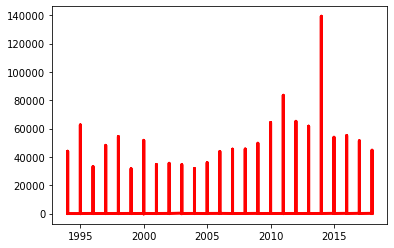

In [155]:
plt.plot(data['report_year'],data['fuel_cost_per_unit_burned'], color = "red", lw =3)

#from this report, we can see year 2017 with the highest fuel cost per unit burned

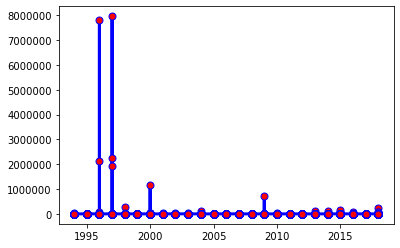

In [156]:
plt.plot(data['report_year'],data['fuel_cost_per_unit_delivered'], color = "blue", marker = 'o', markerfacecolor = "red", markersize = 7,lw =3)

#from this report, we can see year 1997 with the highest fuel cost per unit delivered

In [157]:
data[['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']].head()

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,18.59
1,coal,18.58
2,coal,39.72
3,coal,47.21
4,gas,2.77


In [158]:
data.groupby(['fuel_type_code_pudl', 'report_year'])['fuel_cost_per_unit_burned'].sum()

fuel_type_code_pudl  report_year
coal                 1994            14984.572
                     1995            14571.785
                     1996            12694.803
                     1997            43742.178
                     1998            11902.597
                     1999            16303.468
                     2000           100428.831
                     2001            15109.012
                     2002             9171.164
                     2003            30954.110
                     2004             9632.063
                     2005            11107.182
                     2006            12402.684
                     2007            12965.171
                     2008            14331.348
                     2009            45554.858
                     2010            88627.745
                     2011            17001.015
                     2012            17546.097
                     2013            17629.860
                     2014  

In [159]:
data.groupby("report_year")['fuel_cost_per_unit_delivered'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: fuel_cost_per_unit_delivered, dtype: int64

In [160]:
data.groupby("report_year").describe()

utility_id_ferc1                                                   \
                       count        mean        std  min    25%    50%    75%   
report_year                                                                     
1994                  1235.0  106.120648  61.637376  1.0  49.00  115.0  161.0   
1995                  1201.0  110.139051  62.848480  1.0  55.00  121.0  163.0   
1996                  1088.0  108.714154  62.481365  1.0  51.00  120.0  163.0   
1997                  1094.0  108.366545  60.362734  1.0  56.00  119.0  161.0   
1998                  1107.0  109.845528  60.583260  1.0  56.00  120.0  161.0   
1999                  1050.0  108.222857  61.968732  1.0  55.00  119.0  163.0   
2000                  1373.0  111.083758  66.152352  1.0  51.00  120.0  164.0   
2001                  1356.0  113.521386  68.832136  1.0  55.00  119.5  173.0   
2002                  1205.0  120.354357  75.108768  1.0  55.00  122.0  182.0   
2003                  1211.0  123.300578  75.600574  1.0  55.50  127.0  186.0   
2004                  1192.0  121.123322  72.512675  1.0  56.00  127.0  182.0   
2005                  1269.0  121.028369  75.085698  1.0  55.00  127.0  186.0   
2006                  1243.0  117.178600  72.869473  1.0  55.00  121.0  182.0   
2007                  1264.0  116.040348  72.882279  1.0  51.00  120.0  182.0   
2008                  1228.0  120.785016  75.709915  1.0  56.00  127.0  183.0   
2009                  1222.0  118.139116  76.871807  1.0  51.00  121.0  177.0   
2010                  1261.0  117.992863  75.684427  1.0  51.00  121.0  177.0   
2011                  1240.0  121.069355  76.110461  1.0  55.75  127.0  177.0   
2012                  1243.0  120.769912  75.054656  1.0  55.00  127.0  177.0   
2013                  1199.0  122.082569  72.650126  1.0  56.00  127.0  182.0   
2014                  1171.0  129.263877  89.646521  1.0  56.00  132.0  182.0   
2015                  1093.0  128.591949  83.920139  1.0  57.00  134.0  182.0   
2016                  1034.0  133.117021  87.970166  1.0  57.00  134.0  186.0   
2017                   993.0  131.126888  87.791301  1.0  56.00  134.0  182.0   
2018                   951.0  133.669821  88.412742  1.0  57.50  134.0  186.0   

                   fuel_qty_burned                ...  \
               max           count          mean  ...   
report_year                                       ...   
1994         208.0          1235.0  2.724018e+06  ...   
1995         213.0          1201.0  3.712067e+06  ...   
1996         230.0          1088.0  2.544754e+06  ...   
1997         213.0          1094.0  2.813503e+06  ...   
1998         230.0          1107.0  3.267453e+06  ...   
1999         244.0          1050.0  3.281281e+06  ...   
2000         270.0          1373.0  2.472032e+06  ...   
2001         276.0          1356.0  2.321402e+06  ...   
2002         285.0          1205.0  2.145645e+06  ...   
2003         287.0          1211.0  1.888622e+06  ...   
2004         294.0          1192.0  1.782547e+06  ...   
2005         294.0          1269.0  1.768876e+06  ...   
2006         294.0          1243.0  1.957264e+06  ...   
2007         294.0          1264.0  2.035696e+06  ...   
2008         432.0          1228.0  2.046455e+06  ...   
2009         432.0          1222.0  2.154993e+06  ...   
2010         432.0          1261.0  2.423720e+06  ...   
2011         449.0          1240.0  2.461332e+06  ...   
2012         449.0          1243.0  2.747094e+06  ...   
2013         449.0          1199.0  2.741505e+06  ...   
2014         452.0          1171.0  2.700008e+06  ...   
2015         454.0          1093.0  3.340131e+06  ...   
2016         513.0          1034.0  3.693289e+06  ...   
2017         514.0           993.0  3.352850e+06  ...   
2018         514.0           951.0  4.178890e+06  ...   

            fuel_cost_per_unit_delivered              fuel_cost_per_mmbtu  \
                                     75%          max               c

Analysis showing the relationship between the fuel type and plant_name as we can see the plants where the various type of fuel was made. This helps us know which plant to go when we have certain feedbacks on fuel types.

In [161]:
data.groupby(['fuel_type_code_pudl', 'plant_name_ferc1']).first()

record_id  \
fuel_type_code_pudl plant_name_ferc1                                 
coal                * big cajun 2 unit 3    f1_fuel_1997_12_63_1_7   
                    * campbell 3           f1_fuel_1994_12_41_1_10   
                    * harrison (3)         f1_fuel_1996_12_188_1_7   
                    * independence          f1_fuel_1997_12_8_1_10   
                    * pleasants (4)       f1_fuel_1996_12_188_1_10   
                    * white bluff            f1_fuel_1997_12_8_1_7   
                    *albright             f1_fuel_1997_12_142_0_13   
                    *b.c.2 ut3              f1_fuel_1994_12_63_1_7   
                    *big cajun 2 unit 3     f1_fuel_1995_12_63_1_7   
                    *bridgeport harbor     f1_fuel_1998_12_179_0_4   
                    *dolet hills (3)      f1_fuel_1997_12_164_1_10   
                    *flint creek (1)       f1_fuel_1997_12_164_1_4   
                    *fort martin (2)       f1_fuel_1996_12_101_0_4   
                    *harrison (3)          f1_fuel_1997_12_188_1_7   
                    *hatfield's ferry(2)  f1_fuel_1996_12_188_0_13   
                    *oklaunion              f1_fuel_1997_12_24_2_1   
                    *pirkey (2)            f1_fuel_1997_12_164_1_7   
                    *pleasants            f1_fuel_1997_12_142_0_10   
                    *pleasants (4)        f1_fuel_1997_12_188_1_10   
                    *roy s. nelson unit     f1_fuel_1994_12_63_0_4   
                    *roy s. nelson unit6    f1_fuel_1995_12_63_0_4   
                    4 corner               f1_fuel_1994_12_176_0_7   
                    4 corners                f1_fuel_1994_12_7_0_7   
                    a s king               f1_fuel_1994_12_120_1_7   
                    a.b brown station      f1_fuel_1995_12_163_0_1   
                    a.b. brown station     f1_fuel_1994_12_163_0_1   
                    acme                   f1_fuel_1994_12_175_0_2   
                    albright              f1_fuel_1994_12_142_0_13   
                    albright (1)           f1_fuel_1996_12_101_0_1   
                    allen                   f1_fuel_1994_12_45_0_7   
...                                                            ...   
waste               mcneil                 f1_fuel_2002_12_61_0_13   
                    merrimack              f1_fuel_1994_12_146_0_9   
                    nd unit1               f1_fuel_1994_12_194_4_9   
                    nelson dewey 1 & 2    f1_fuel_1995_12_194_4_15   
                    nelson dewey 1 and 2   f1_fuel_2001_12_194_3_6   
                    nelson dewey u 1&2     f1_fuel_1998_12_194_3_6   
                    nelson dewey unit 1    f1_fuel_1995_12_194_4_9   
                    nelson dewey unit 2   f1_fuel_1994_12_194_4_12   
                    nelsondewey units1&2  f1_fuel_1994_12_194_4_15   
                    ottumwa                f1_fuel_2000_12_69_1_15   
                    pittsylvania           f1_fuel_2005_12_186_5_7   
                    pittsysvania           f1_fuel_2004_12_186_5_7   
                    polyester              f1_fuel_2013_12_186_5_6   
                    r.m. heskett            f1_fuel_2011_12_95_0_2   
                    r.m.heskett contin.     f1_fuel_1997_12_95_0_4   
                    rock river             f1_fuel_1994_12_194_5_9   
                    rock river 1 & 2      f1_fuel_1996_12_194_5_15   
                    rock river unit 1      f1_fuel_1995_12_194_5_9   
                    rock river unit 2     f1_fuel_1994_12_194_5_12   
                    rock river units 1&2  f1_fuel_1994_12_194_5_15   
                    rothschild             f1_fuel_2015_12_193_1_7   
                    rothschild-total      f1_fuel_2013_12_193_0_13   
                    schiller               f1_fuel_2006_12_146_0_2   
                    sibley                 f1_fuel_2013_12_182_0_3   
                    sioux                  f1_fuel_1994_12_177_0_6 

In [162]:
data.corr()['fuel_cost_per_unit_burned'].sort_values(ascending =  True)
#picking 2nd and 3rd values

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [163]:
A = [1,2,3,4,5,6]
B = [13,21,34]

In [164]:
A.extend(B)

In [165]:
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [166]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])